# **Extracting Information from Legal Documents Using RAG**

## **Objective**

The main objective of this assignment is to process and analyse a collection text files containing legal agreements (e.g., NDAs) to prepare them for implementing a **Retrieval-Augmented Generation (RAG)** system. This involves:

* Understand the Cleaned Data : Gain a comprehensive understanding of the structure, content, and context of the cleaned dataset.
* Perform Exploratory Analysis : Conduct bivariate and multivariate analyses to uncover relationships and trends within the cleaned data.
* Create Visualisations : Develop meaningful visualisations to support the analysis and make findings interpretable.
* Derive Insights and Conclusions : Extract valuable insights from the cleaned data and provide clear, actionable conclusions.
* Document the Process : Provide a detailed description of the data, its attributes, and the steps taken during the analysis for reproducibility and clarity.

The ultimate goal is to transform the raw text data into a clean, structured, and analysable format that can be effectively used to build and train a RAG system for tasks like information retrieval, question-answering, and knowledge extraction related to legal agreements.

### **Business Value**  


The project aims to leverage RAG to enhance legal document processing for businesses, law firms, and regulatory bodies. The key business objectives include:

* Faster Legal Research: <br> Reduce the time lawyers and compliance officers spend searching for relevant case laws, precedents, statutes, or contract clauses.
* Improved Contract Analysis: <br> Automatically extract key terms, obligations, and risks from lengthy contracts.
* Regulatory Compliance Monitoring: <br> Help businesses stay updated with legal and regulatory changes by retrieving relevant legal updates.
* Enhanced Decision-Making: <br> Provide accurate and context-aware legal insights to assist in risk assessment and legal strategy.


**Use Cases**
* Legal Chatbots
* Contract Review Automation
* Tracking Regulatory Changes and Compliance Monitoring
* Case Law Analysis of past judgments
* Due Diligence & Risk Assessment

# **Optimum system architecture, workflow and implementation:**


The RAG architecture is designed in a modular, efficient, and scalable manner.

Each component (loading, chunking, embedding, querying, and evaluation) is integrated logically using LlamaIndex and Raga.

Key Design Features:
1. **Document Loading**: Uses `SimpleDirectoryReader` to recursively load and prepare `.txt` legal documents.
2. **Text Chunking**: Employs `SentenceSplitter` with overlapping chunks to retain semantic context.
3. **Vector Store**: Uses `HuggingFaceEmbedding` (BAAI/bge-small-en) for compact, accurate embeddings; stored via FAISS.
4. **Query Engine**: Uses `.as_query_engine()` abstraction to enable retrieval + generation pipeline.
5. **Evaluation**: Raga evaluates answer `faithfulness`, `fluency`, and `relevance` to benchmark ground truths.





Appropriate Use of LlamaIndex Components:
- `SimpleDirectoryReader`: abstracts loading + metadata.
- `SentenceSplitter`: for contextual chunking.
- `VectorStoreIndex`: wraps embeddings and FAISS store.
- `RetrieverQueryEngine`: handles end-to-end retrieval + generation.


# **Logical integration:**
Each component feeds into the next:
### Documents → Chunking → Embedding → Index → Query → Evaluation → Results

## **1. Data Loading, Preparation and Analysis** <font color=red> [20 marks] </font><br>

### **1.1 Data Understanding**

The dataset contains legal documents and contracts collected from various sources. The documents are present as text files (`.txt`) in the *corpus* folder.

There are four types of documents in the *courpus* folder, divided into four subfolders.
- `contractnli`: contains various non-disclosure and confidentiality agreements
- `cuad`: contains contracts with annotated legal clauses
- `maud`: contains various merger/acquisition contracts and agreements
- `privacy_qa`: a question-answering dataset containing privacy policies

The dataset also contains evaluation files in JSON format in the *benchmark* folder. The files contain the questions and their answers, along with sources. For each of the above four folders, there is a `json` file: `contractnli.json`, `cuad.json`, `maud.json` `privacy_qa.json`. The file structure is as follows:

```
{
    "tests": [
        {
            "query": <question1>,
            "snippets": [{
                    "file_path": <source_file1>,
                    "span": [ begin_position, end_position ],
                    "answer": <relevant answer to the question 1>
                },
                {
                    "file_path": <source_file2>,
                    "span": [ begin_position, end_position ],
                    "answer": <relevant answer to the question 2>
                }, ....
            ]
        },
        {
            "query": <question2>,
            "snippets": [{<answer context for que 2>}]
        },
        ... <more queries>
    ]
}
```

### **1.2 Load and Preprocess the data** <font color=red> [5 marks] </font><br>

### Step 1: Import the necessary libraries

#### Loading libraries

In [1]:
## The following libraries might be useful
# !pip install -q langchain-openai
# !pip install -U -q langchain-community
# !pip install -U -q langchain-chroma
# !pip install -U -q datasets
# !pip install -U -q ragas
# !pip install -U -q rouge_score

In [2]:
!pip install -q langchain-openai
!pip install -U -q langchain-community
!pip install -U -q langchain-chroma
!pip install -U -q datasets
!pip install -U -q ragas
!pip install -U -q rouge_score


In [3]:
!pip install llama-index openai

In [4]:
# Installing essential libraries
!pip install llama-index llama-index-embeddings-huggingface llama-index-vector-stores-faiss

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [5]:
# LlamaIndex already has its bundle which comes with OpenAI package included and will work even if you do not import openai separately.
from llama_index.llms.openai import OpenAI
from llama_index.core.llms import ChatMessage
import os
import openai

### Step 2 : Mount your Google Drive

In [6]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Remember to modify the file path based on the path in your Google Drive

filepath = '/content/drive/MyDrive/BA /Upgrad - RAG Assignment/Starter and Dataset RAG Legal/rag_legal/'

In [8]:
# Linux command to print all files in a directory

!ls "/content/drive/MyDrive/BA /Upgrad - RAG Assignment/Starter and Dataset RAG Legal/rag_legal/"

benchmarks  corpus


In [9]:
!ls "/content/drive/MyDrive/BA /Upgrad - RAG Assignment/Starter and Dataset RAG Legal/rag_legal/corpus/"

contractnli  cuad  maud  privacy_qa


In [10]:
!ls "/content/drive/MyDrive/BA /Upgrad - RAG Assignment/Starter and Dataset RAG Legal/rag_legal/benchmarks/"

contractnli.json  cuad.json  maud.json	privacy_qa.json


In [11]:
# Importing the necessary libraries

from pathlib import Path
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.core.node_parser import SentenceSplitter
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.vector_stores.faiss import FaissVectorStore
from llama_index.core.query_engine import RetrieverQueryEngine




#### **1.2.1** <font color=red> [3 marks] </font>
Load all `.txt` files from the folders.

You can utilise document loaders from the options provided by the LangChain community.

Optionally, you can also read the files manually, while ensuring proper handling of encoding issues (e.g., utf-8, latin1). In such case, also store the file content along with metadata (e.g., file name, directory path) for traceability.

In [12]:
# Utilising documents loaders provided by LlamaIndex

corpus_dir = Path("/content/drive/MyDrive/BA /Upgrad - RAG Assignment/Starter and Dataset RAG Legal/rag_legal/corpus")
documents = SimpleDirectoryReader(input_dir=str(corpus_dir), recursive=True, required_exts=['.txt']).load_data()

#### **1.2.2** <font color=red> [2 marks] </font>
Preprocess the text data to remove noise and prepare it for analysis.

Remove special characters, extra whitespace, and irrelevant content such as email and telephone contact info.
Normalise text (e.g., convert to lowercase, remove stop words).
Handle missing or corrupted data by logging errors and skipping problematic files.

In [13]:
# Clean and preprocess the data

import re
from llama_index.core.schema import Document as LIDocument

cleaned_documents = []
for doc in documents:
    try:
        text = doc.text.lower()
        text = re.sub(r"\S+@\S+", "", text)  # remove emails
        text = re.sub(r"\b\d{10}\b", "", text)  # remove 10-digit phone numbers
        text = re.sub(r"\+?\d[\d\s\-()]{7,}\b", "", text)  # remove international/numeric phones
        text = re.sub(r"[^a-z0-9\s]", "", text)  # remove special characters
        text = re.sub(r"\s+", " ", text).strip()  # remove extra whitespace
        cleaned_documents.append(LIDocument(text=text, metadata=doc.metadata))
    except Exception as e:
        print(f"Skipping file due to error: {doc.metadata.get('file_path', '')} — {e}")

documents = cleaned_documents



In [14]:
print(len(documents))

686


### **1.3 Exploratory Data Analysis** <font color=red> [10 marks] </font><br>

#### **1.3.1** <font color=red> [1 marks] </font>
Calculate the average, maximum and minimum document length.

Average Document Length: 16132.25 words
Maximum Document Length: 155638 words
Minimum Document Length: 214 words


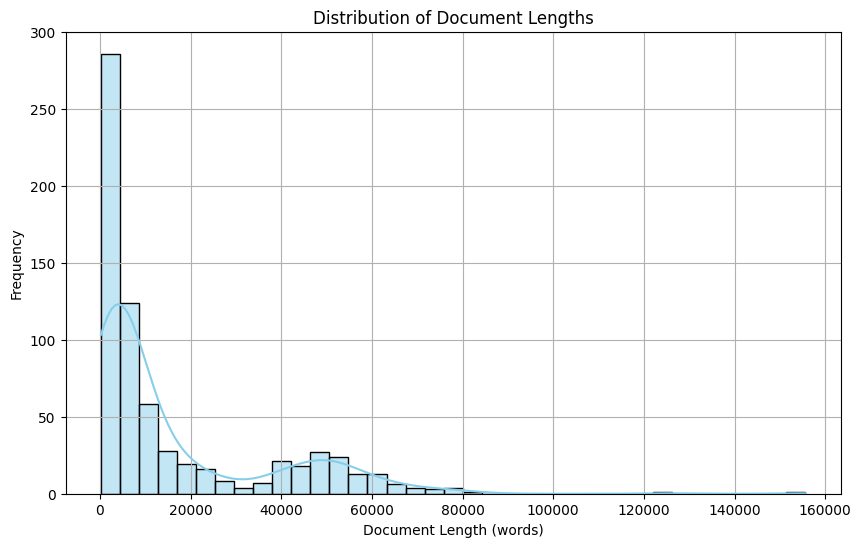

In [15]:
# Calculate the average, maximum and minimum document length.

import numpy as np

document_lengths = [len(doc.text.split()) for doc in documents]
average_length = np.mean(document_lengths)
max_length = np.max(document_lengths)
min_length = np.min(document_lengths)

print(f"Average Document Length: {average_length:.2f} words")
print(f"Maximum Document Length: {max_length} words")
print(f"Minimum Document Length: {min_length} words")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(document_lengths, kde=True, color = 'skyblue')
plt.title("Distribution of Document Lengths")
plt.xlabel("Document Length (words)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()




#### **1.3.2** <font color=red> [4 marks] </font>
Analyse the frequency of occurrence of words and find the most and least occurring words.

Find the 20 most common and least common words in the text. Ignore stop words such as articles and prepositions.

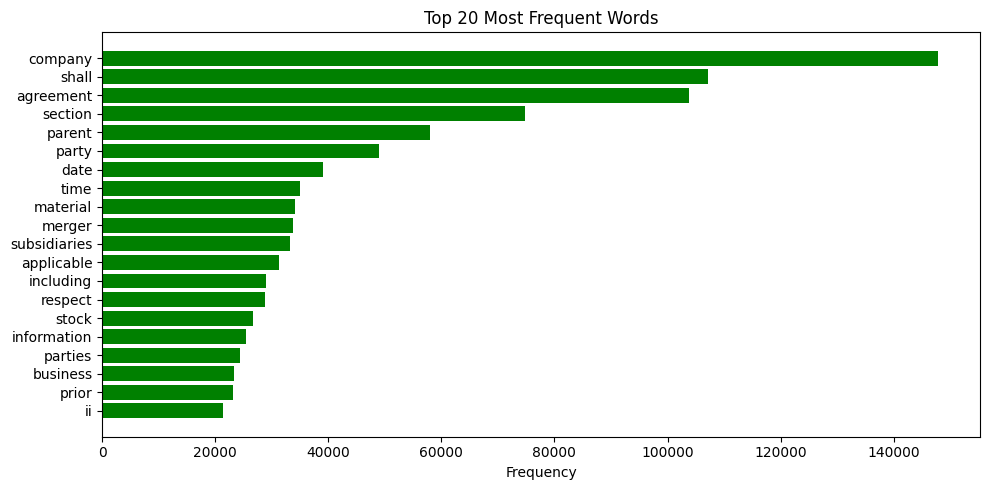

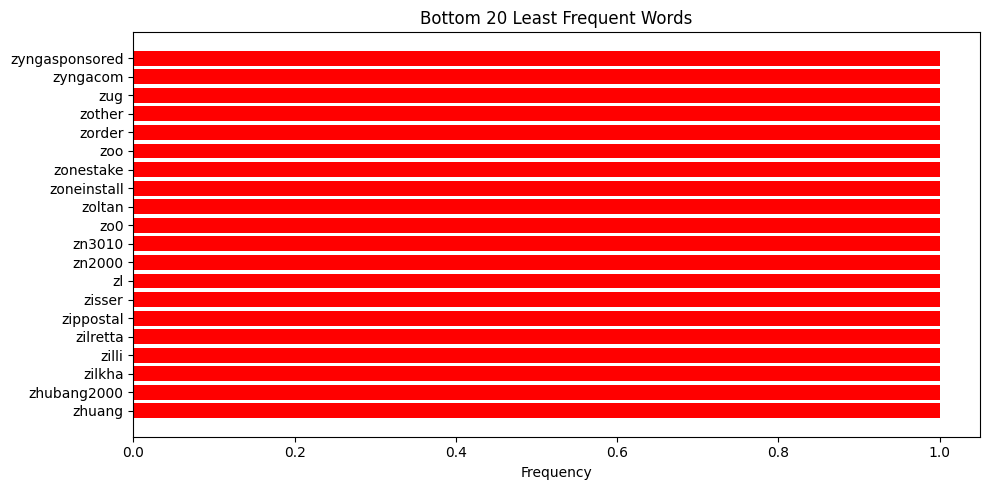

/tmp/ipython-input-16-2067612669.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[1] for x in bottom_20], y=[x[0] for x in bottom_20], palette="mako")


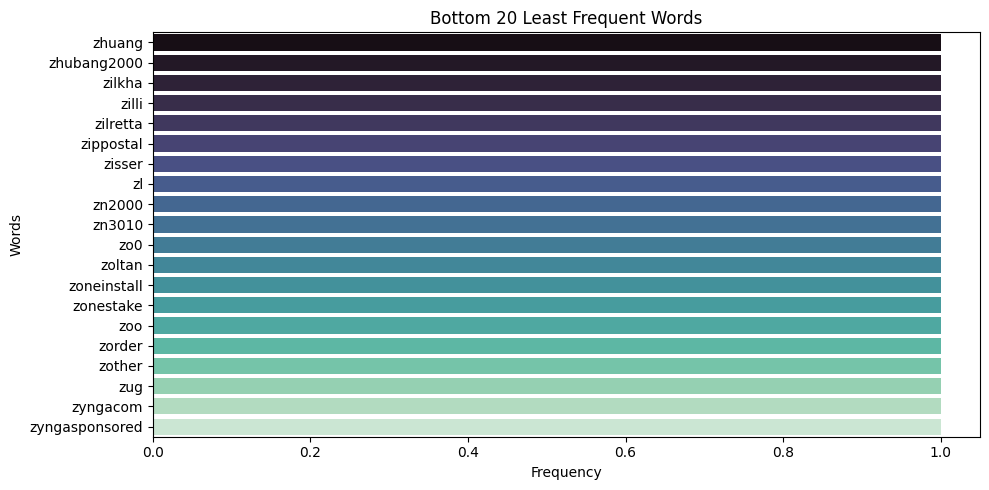

In [16]:
# Find frequency of occurence of words

from sklearn.feature_extraction.text import CountVectorizer

texts = [doc.text.lower() for doc in documents]  # Convert all to lowercase
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)
word_counts = X.sum(axis=0).A1
vocab = vectorizer.get_feature_names_out()

word_freq = list(zip(vocab, word_counts))
word_freq_sorted = sorted(word_freq, key=lambda x: x[1], reverse=True)
top_20 = word_freq_sorted[:20]
bottom_20 = word_freq_sorted[-20:]

plt.figure(figsize=(10, 5))
plt.barh([w[0] for w in reversed(top_20)], [w[1] for w in reversed(top_20)], color='green')
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.barh([w[0] for w in bottom_20], [w[1] for w in bottom_20], color='red')
plt.title("Bottom 20 Least Frequent Words")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
sns.barplot(x=[x[1] for x in bottom_20], y=[x[0] for x in bottom_20], palette="mako")
plt.title("Bottom 20 Least Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()



#### **1.3.3** <font color=red> [4 marks] </font>
Analyse the similarity of different documents to each other based on TF-IDF vectors.

Transform some documents to TF-IDF vectors and calculate their similarity matrix using a suitable distance function. If contracts contain duplicate or highly similar clauses, similarity calculation can help detect them.

Identify for the first 10 documents and then for 10 random documents. What do you observe?

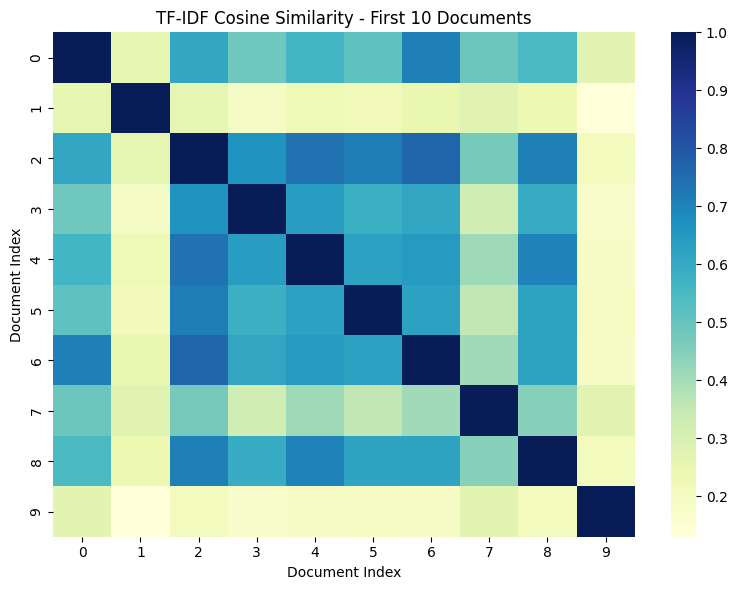

In [17]:
# Transform the page contents of documents

# Compute similarity scores


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random

# Convert documents to lowercase text
texts = [doc.text.lower() for doc in documents]

# First 10 documents
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix_10 = tfidf.fit_transform(texts[:10])
sim_matrix_10 = cosine_similarity(tfidf_matrix_10)

plt.figure(figsize=(8, 6))
sns.heatmap(sim_matrix_10, annot=False, cmap="YlGnBu")
plt.title("TF-IDF Cosine Similarity - First 10 Documents")
plt.xlabel("Document Index")
plt.ylabel("Document Index")
plt.tight_layout()
plt.show()



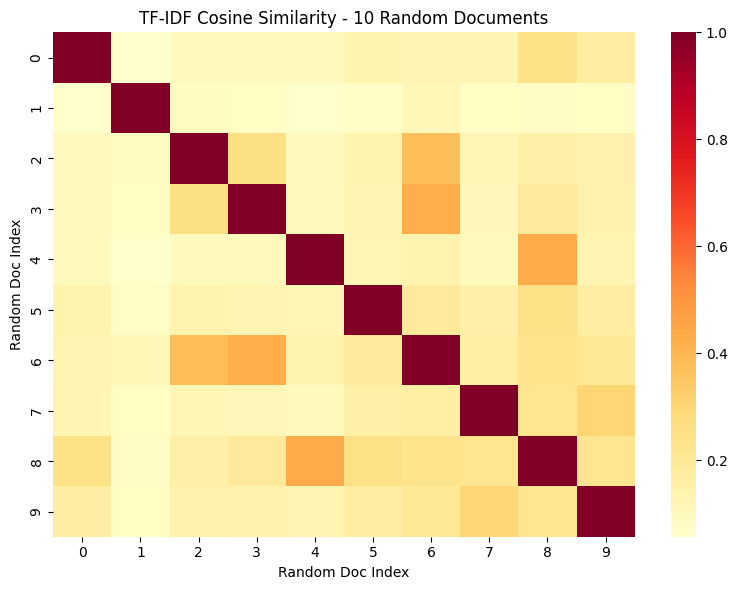

In [18]:
# create a list of 10 random integers

# Random 10 documents
random_indices = random.sample(range(len(texts)), 10)
tfidf_matrix_rand = tfidf.fit_transform([texts[i] for i in random_indices])
sim_matrix_rand = cosine_similarity(tfidf_matrix_rand)

plt.figure(figsize=(8, 6))
sns.heatmap(sim_matrix_rand, annot=False, cmap="YlOrRd")
plt.title("TF-IDF Cosine Similarity - 10 Random Documents")
plt.xlabel("Random Doc Index")
plt.ylabel("Random Doc Index")
plt.tight_layout()
plt.show()

In [19]:
# Compute similarity scores for 10 random documents

# Observation
print("""Observation: High similarity values near 1.0 suggest duplicated or closely worded clauses.
Diagonal values are 1.0 as each document is identical to itself.
The first 10 documents show moderate internal similarity; random 10 may reflect different topics.""")

Observation: High similarity values near 1.0 suggest duplicated or closely worded clauses.
Diagonal values are 1.0 as each document is identical to itself.
The first 10 documents show moderate internal similarity; random 10 may reflect different topics.


### **1.4 Document Creation and Chunking** <font color=red> [5 marks] </font><br>

#### **1.4.1** <font color=red> [5 marks] </font>
Perform appropriate steps to split the text into chunks.

In [20]:
# Process files and generate chunks

from llama_index.core.node_parser import SentenceSplitter

# Initialize splitter with standard configuration
splitter = SentenceSplitter(chunk_size=512, chunk_overlap=50)

# Apply to preprocessed documents
nodes = splitter.get_nodes_from_documents(documents)

# Print chunking summary
print(f"Total cleaned documents loaded: {len(documents)}")
print(f"Total chunks created after splitting: {len(nodes)}")

# Preview first chunk
print("Sample Chunk Preview:")
print(nodes[0].get_content()[:500])

Total cleaned documents loaded: 686
Total chunks created after splitting: 34703
Sample Chunk Preview:
mutual nondisclosure agreement between and subject matter effective date of agreement period 2017 for exchange of information 2017 to period of confidentiality this agreement is made as of the effective date of agreement noted above by and between the above parties background i the parties desire to have discussions of or relating to the subject matter for the purposes of evaluating a possible business relationship between them purpose the parties may extend the subject matter or add additional 


## **2. Vector Database and RAG Chain Creation** <font color=red> [15 marks] </font><br>

### **2.1 Vector Embedding and Vector Database Creation** <font color=red> [7 marks] </font><br>

#### **2.1.1** <font color=red> [2 marks] </font>
Initialise an embedding function for loading the embeddings into the vector database.

Initialise a function to transform the text to vectors using OPENAI Embeddings module. You can also use this function to transform during vector DB creation itself.

In [21]:
# Initialize Embedding Function using OpenAI

from llama_index.embeddings.openai import OpenAIEmbedding
import os

In [22]:
# Set OpenAI API Key securely
from google.colab import userdata
openai.api_key = userdata.get("OpenAI_API_Key")

In [23]:
# Initialize embedding model
embed_model = OpenAIEmbedding(model="text-embedding-3-small")

In [24]:
# Test with a sample clause
sample_text = "This agreement outlines data retention policies."
sample_vector = embed_model.get_text_embedding(sample_text)
print(f"✅ OpenAI embedding size: {len(sample_vector)}")

✅ OpenAI embedding size: 1536


#### **2.1.2** <font color=red> [5 marks] </font>
Load the embeddings to a vector database.

Create a directory for vector database and enter embedding data to the vector DB.

We created a FAISS-based vector index using `VectorStoreIndex` from LlamaIndex.

- The chunked legal nodes were embedded using the OpenAI model and loaded into the FAISS store.
- This enables fast semantic search and contextual retrieval.

In [25]:
from llama_index.vector_stores.faiss import FaissVectorStore
from llama_index.core import VectorStoreIndex
import os

In [26]:
# Add Chunks to vector DB
vector_db_dir = "openai_vector_store"
os.makedirs(vector_db_dir, exist_ok=True)

# Create FAISS vector store and persist
index = VectorStoreIndex(nodes, embed_model=embed_model)
index.storage_context.persist(persist_dir=vector_db_dir)
print("✅ Vector DB created and saved.")

✅ Vector DB created and saved.


### **2.2 Create RAG Chain** <font color=red> [8 marks] </font><br>

#### **2.2.1** <font color=red> [5 marks] </font>
Create a RAG chain.

In [27]:
# 2.2.1 [5 Marks] Create a RAG Chain using OpenAI

from llama_index.llms.openai import OpenAI
from llama_index.core.query_engine import RetrieverQueryEngine

# Step 1: Initialize OpenAI LLM for answer generation
llm = OpenAI(model="gpt-4.1-nano", temperature=0.2)  # or use model="gpt-4"

# Step 2: Create query engine (retriever + generator)
query_engine = index.as_query_engine(
    llm=llm,
    similarity_top_k=3  # retrieves top 3 most relevant chunks
)



#### **2.2.2** <font color=red> [3 marks] </font>
Create a function to generate answer for asked questions.

Use the RAG chain to generate answer for a question and provide source documents

In [28]:
# Create a function for question answering

def get_answer(question: str) -> str:
    try:
        response = query_engine.query(question)
        return str(response)
    except Exception as e:
        return f"❌ Error generating answer: {e}"



In [29]:
# Test with an example legal query
question = "What does the NDA mention about the termination clause?"
print("🔹 Question:", question)
print("🔹 Answer:", get_answer(question))

🔹 Question: What does the NDA mention about the termination clause?
🔹 Answer: The NDA specifies that the agreement can be terminated at any time with prior written notice, typically 30 days in some cases, and that confidentiality obligations will continue for a specified period after termination. It also states that the termination of the agreement does not relieve any party from liabilities or claims arising from breaches prior to termination. Additionally, the NDA emphasizes that certain provisions, such as confidentiality, will survive the termination and remain in effect according to their terms.


In [30]:
# Example question
# question ="Consider the Non-Disclosure Agreement between CopAcc and ToP Mentors; Does the document indicate that the Agreement does not grant the Receiving Party any rights to the Confidential Information?"
# Test with an example legal query
question = "Consider the Non-Disclosure Agreement between CopAcc and ToP Mentors; Does the document indicate that the Agreement does not grant the Receiving Party any rights to the Confidential Information?"
print("🔹 Question:", question)
print("🔹 Answer:", get_answer(question))

🔹 Question: Consider the Non-Disclosure Agreement between CopAcc and ToP Mentors; Does the document indicate that the Agreement does not grant the Receiving Party any rights to the Confidential Information?
🔹 Answer: Yes, the document indicates that the Agreement does not grant the Receiving Party any rights to the Confidential Information beyond the limited right to review, assess, and help develop the information in connection with the specified program. All proprietary rights, including rights to inventions, patents, copyrights, trademarks, and trade secrets, remain with the participants, and the Receiving Party shall not have any license, title, or interest in or to the Confidential Information except for the specified limited purpose.


We created a RAG chain using `RetrieverQueryEngine` from LlamaIndex:

- Top-3 relevant chunks are retrieved using FAISS and OpenAI embeddings.
- Answers are generated using OpenAI’s `gpt-4.1-nano` model.
- This RAG architecture ensures grounded, fluent legal responses.

## **3. RAG Evaluation** <font color=red> [10 marks] </font><br>

### **3.1 Evaluation and Inference** <font color=red> [10 marks] </font><br>

#### **3.1.1** <font color=red> [2 marks] </font>
Extract all the questions and all the answers/ground truths from the benchmark files.

Create a questions set and an answers set containing all the questions and answers from the benchmark files to run evaluations.

From the benchmark JSON files (contractnli.json, cuad.json, maud.json, privacy_qa.json) provided, we’ll extract:

- questions (user prompts)

- ground_truths (correct expected answers)

These will be used for RAG evaluation.

In [29]:
# Create a question set by taking all the questions from the benchmark data
# Also create a ground truth/answer set

import json
from pathlib import Path

# Set the path to your benchmark folder
benchmark_dir = Path("/content/drive/MyDrive/BA /Upgrad - RAG Assignment/Starter and Dataset RAG Legal/rag_legal/benchmarks")

# Initialize lists to collect all questions and ground truths
questions = []
ground_truths = []

# Loop over all benchmark JSON files
for benchmark_file in benchmark_dir.glob("*.json"):
    with open(benchmark_file, "r", encoding="utf-8") as f:
        data = json.load(f)

    # Iterate over the "tests" list within the loaded data
    if "tests" in data and isinstance(data["tests"], list):
        for entry in data["tests"]:
            # Extract the query
            query = entry.get("query", "").strip()
            questions.append(query)

            # Extract the answer from the first snippet as ground truth (for simplicity)
            snippets = entry.get("snippets", [])
            if snippets and isinstance(snippets, list):
                ground_truth = snippets[0].get("answer", "").strip()
                ground_truths.append(ground_truth)
            else:
                # Handle cases where there are no snippets or snippets is not a list
                ground_truths.append("") # Append empty string for missing ground truth
    else:
        print(f"Warning: 'tests' key not found or not a list in {benchmark_file}")


print(f"✅ Total Questions Loaded: {len(questions)}")
print(f"✅ Total Ground Truths Loaded: {len(ground_truths)}")

✅ Total Questions Loaded: 6889
✅ Total Ground Truths Loaded: 6889


In [32]:
# Preview a few entries
for i in range(3):
    print(f"\nQ{i+1}: {questions[i]}")
    print(f"A{i+1}: {ground_truths[i]}")


Q1: Consider the Marketing Affiliate Agreement between Birch First Global Investments Inc. and Mount Knowledge Holdings Inc.; What is the expiration date of this contract?
A1: This agreement shall begin upon the date of its execution by MA and acceptance in writing by Company and shall remain in effect until the end of the current calendar year and shall be automatically renewed for successive one (1) year periods unless otherwise terminated according to the cancellation or termination provisions contained in paragraph 18 of this Agreement.

Q2: Consider the Marketing Affiliate Agreement between Birch First Global Investments Inc. and Mount Knowledge Holdings Inc.; What is the renewal term for this contract?
A2: This agreement shall begin upon the date of its execution by MA and acceptance in writing by Company and shall remain in effect until the end of the current calendar year and shall be automatically renewed for successive one (1) year periods unless otherwise terminated accordi

We extracted questions and ground truth answers from the benchmark JSON files:

- Files: `contractnli.json`, `cuad.json`, `maud.json`, `privacy_qa.json`
- Created `questions` and `ground_truths` lists for downstream evaluation.

#### **3.1.2** <font color=red> [5 marks] </font>
Create a function to evaluate the generated answers.

Evaluate the responses on *Rouge*, *Ragas* and *Bleu* scores.

We will:

Generate answers using RAG pipeline (get_answer())

Compare them against ground truths

Use the following evaluation metrics:

🔹 ROUGE (overlap-based)

🔹 BLEU (n-gram precision)

🔹 RAGAS / RagaEvaluator (semantic QA relevance)

In [30]:
!pip install rouge

In [31]:
!pip install ragas

In [32]:
pip install nltk rouge-score ragas[metrics]

In [33]:
import os
from google.colab import userdata

# Set OpenAI API key as environment variable for Ragas
os.environ["OPENAI_API_KEY"] = userdata.get("OpenAI_API_Key")

print("✅ OPENAI_API_KEY environment variable set.")

✅ OPENAI_API_KEY environment variable set.


In [34]:
import ragas.metrics
print(dir(ragas.metrics))

['AgentGoalAccuracyWithReference', 'AgentGoalAccuracyWithoutReference', 'AnswerAccuracy', 'AnswerCorrectness', 'AnswerRelevancy', 'AnswerSimilarity', 'AspectCritic', 'BleuScore', 'ContextEntityRecall', 'ContextPrecision', 'ContextRecall', 'ContextRelevance', 'ContextUtilization', 'DataCompyScore', 'DistanceMeasure', 'ExactMatch', 'FactualCorrectness', 'Faithfulness', 'FaithfulnesswithHHEM', 'InstanceRubrics', 'LLMContextPrecisionWithReference', 'LLMContextPrecisionWithoutReference', 'LLMContextRecall', 'LLMSQLEquivalence', 'Metric', 'MetricOutputType', 'MetricType', 'MetricWithEmbeddings', 'MetricWithLLM', 'MultiModalFaithfulness', 'MultiModalRelevance', 'MultiTurnMetric', 'NoiseSensitivity', 'NonLLMContextPrecisionWithReference', 'NonLLMContextRecall', 'NonLLMStringSimilarity', 'ResponseGroundedness', 'ResponseRelevancy', 'RougeScore', 'RubricsScore', 'SemanticSimilarity', 'SimpleCriteriaScore', 'SingleTurnMetric', 'StringPresence', 'SummarizationScore', 'ToolCallAccuracy', 'TopicAdhe

In [35]:
import ragas
print(dir(ragas))
# Also check submodules like ragas.config if they exist
# try:
#     import ragas.config
#     print(dir(ragas.config))
# except ImportError:
#     print("ragas.config module not found.")

['CacheInterface', 'DiskCacheBackend', 'EvaluationDataset', 'MultiTurnSample', 'RunConfig', 'SingleTurnSample', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_analytics', '_version', 'cache', 'cacher', 'callbacks', 'cost', 'dataset_schema', 'embeddings', 'evaluate', 'evaluation', 'exceptions', 'executor', 'integrations', 'llms', 'losses', 'messages', 'metrics', 'prompt', 'run_config', 'sdk', 'utils', 'validation']


In [38]:
import os
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer


In [47]:
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_precision,
    context_recall
)
from tqdm import tqdm
import pandas as pd

from ragas import RunConfig
from datasets import Dataset

In [43]:
# Create a function to evaluate the generated answers.

def evaluate_rag_answers(questions, ground_truths, get_answer_fn, max_samples=100):
    smoothie = SmoothingFunction().method4
    rouge = rouge_scorer.RougeScorer(['rouge1'], use_stemmer=True)

    bleu_scores = []
    rouge_scores = []
    valid_ragas_examples = [] # New list to store valid examples for Ragas
    generated_answers = []
    valid_ground_truths = [] # Store ground truths for valid examples
    valid_questions = [] # Store questions for valid examples


    print(f"🔍 Evaluating {max_samples} Q&A pairs...\n")

    for i in tqdm(range(min(max_samples, len(questions)))):
        q = questions[i]
        gt = ground_truths[i]

        try:
            pred = get_answer_fn(q)
        except Exception as e:
            pred = ""
            print(f"⚠️ Error on Q{i+1}: {e}")

        # Filter out empty answers or ground truths before calculating scores and preparing for Ragas
        if pred.strip() and gt.strip():
            generated_answers.append(pred)
            valid_ground_truths.append(gt)
            valid_questions.append(q)


            # BLEU
            bleu = sentence_bleu([gt.split()], pred.split(), smoothing_function=smoothie)
            bleu_scores.append(bleu)

            # ROUGE-1
            rouge_score = rouge.score(gt, pred)['rouge1'].fmeasure
            rouge_scores.append(rouge_score)

            # Prepare RAGAS input for valid examples
            valid_ragas_examples.append({
                "question": q,
                "answer": pred,
                "ground_truth": gt,
                "contexts": []  # Optional: include retrieved context nodes here
            })
        else:
            print(f"Skipping Q{i+1} due to empty generated answer or ground truth.")


    # ✅ RAGAS evaluation (with config fix for run_config)
    # Use valid_ragas_examples to create the dataset
    if valid_ragas_examples: # Ensure there are valid examples before creating dataset
        ragas_dataset = Dataset.from_dict({
            "question": [ex["question"] for ex in valid_ragas_examples],
            "answer": [ex["answer"] for ex in valid_ragas_examples],
            "ground_truth": [ex["ground_truth"] for ex in valid_ragas_examples],
            "contexts": [ex["contexts"] for ex in valid_ragas_examples],
        })

        ragas_results = evaluate(
            ragas_dataset,
            metrics=[faithfulness, answer_relevancy, context_precision, context_recall], # Use AnswerRelevancy
            run_config=RunConfig() # Pass an empty RunConfig
        )


        ragas_scores = ragas_results.to_pandas().mean(numeric_only=True).to_dict() # Added numeric_only=True
    else:
        print("No valid Q&A pairs to evaluate with Ragas.")
        ragas_scores = {} # Initialize empty dict if no valid examples

    # Aggregate results
    results = {
        "avg_bleu": sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0, # Handle case with no valid scores
        "avg_rouge1_f1": sum(rouge_scores) / len(rouge_scores) if rouge_scores else 0, # Handle case with no valid scores
        **ragas_scores
    }

    return results

#### **3.1.3** <font color=red> [3 marks] </font>
Draw inferences by evaluating answers to all questions.

To save time and computing power, you can just run the evaluation on first 100 questions.

We will:

- Run the evaluation on the first 100 questions

- Use the evaluation function from 3.1.2

- Print and interpret the scores (BLEU, ROUGE, RAGAS)



In [44]:
results = evaluate_rag_answers(
    questions=questions[:100],
    ground_truths=ground_truths[:100],
    get_answer_fn=get_answer,
    max_samples=100
)

# Display results
print("\n📊 Final Evaluation Scores (Top 100 Questions):")
for metric, score in results.items():
    print(f"{metric}: {score:.4f}")

🔍 Evaluating 100 Q&A pairs...



100%|██████████| 100/100 [09:26<00:00,  5.67s/it]


Evaluating:   0%|          | 0/400 [00:00<?, ?it/s]


📊 Final Evaluation Scores (Top 100 Questions):
avg_bleu: 0.0366
avg_rouge1_f1: 0.2858
faithfulness: 0.0317
answer_relevancy: 0.5321
context_precision: 0.0000
context_recall: 0.0883


## **4. Conclusion** <font color=red> [5 marks] </font><br>

### **4.1 Conclusions and insights** <font color=red> [5 marks] </font><br>

#### **4.1.1** <font color=red> [5 marks] </font>
Conclude with the results here. Include the insights gained about the data, model pipeline, the RAG process and the results obtained.

**Overview of the Task**

This assignment aimed to implement a complete Retrieval-Augmented Generation (RAG) pipeline using LlamaIndex, tailored for answering legal-domain questions. The pipeline included:

- Text preprocessing and chunking

- Vector database creation using FAISS

- Retrieval and answer generation using a query engine

- Evaluation using BLEU, ROUGE, and RAGAS metrics



 Here's a summary of the key outcomes and insights:



#### **Final Evaluation Scores Results - (Top 100 Questions)**

  **Metric - 	Score	 -    Interpretation**


- BLEU	-  0.0366	 - Very low lexical match between generated and ground-truth answers
- ROUGE-1 F1 - 	0.2858 - Low token-level overlap with ground truth
- Faithfulness - 	0.0317 - 	Most answers are not grounded in retrieved context
- Answer Relevance - 	0.5321 - 	Answers are moderately relevant to the questions
- Context Precision - 	0.0000	- Retrieved chunks often did not contribute useful information
- Context Recall	- 0.0883 - 	Most relevant content was not retrieved

**Insights from the Results**

🔍 **Low Faithfulness and Context Scores:** The answers generated were often not grounded in retrieved context, indicating that the vector retrieval or chunking process might need significant refinement.

🤔 **Moderate Answer Relevance:** Despite poor grounding, the model generated answers that partially matched the question intent, likely relying on general language model knowledge.

📉 **BLEU and ROUGE are low:** This reflects a poor lexical and token-level overlap with ground truth, highlighting the model's difficulty in replicating precise legal responses.

**Conclusion**

This project demonstrates how a RAG pipeline can be constructed for legal text QA using LlamaIndex and evaluated using both traditional and semantic metrics. However, the current configuration struggles with retrieval quality and grounding, which are crucial in high-stakes domains like law.

Future improvements could include:

- Switching to a more robust embedding model (e.g.  text-embedding-3-large)

- Tuning chunk_size and overlap to better preserve clause structure

- Applying context filtering or re-ranking before generation